# Tarea 2 - Ana Cristina Molina - cc. 1044508251

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def harmonic_potential(x):
    """Quamtum armonic oscillator potential
    
    Args:
        x (float): position of the particle
    Returns:
        float: value of the potential at x"""
    return 0.5*x**2

def rho_free(x, xp, beta):
    """ Free off-diagonal density matrix 
    Args:
        x (float): position of the particle
        xp (float): prima position of the particle
        beta (float): inverse temperature
    Returns:
        float: value of the density matrix at x and xp and beta
    """
    return np.exp(-(x - xp) ** 2 / (2.0 * beta)) / np.sqrt(2.0 * np.pi * beta)

def rho_harmonic_trotter(grid, beta, potential):
    """ Harmonic density matrix in the Trotter approximation 
    Args:
        grid (float): grid of positions of the particle
        beta (float): inverse temperature
    Returns:
        float: value of the density matrix at x and xp and beta
    """
    return np.array([[rho_free(x, xp, beta) * np.exp(-0.5 * beta * (potential(x) + potential(xp))) #)0.5 * (x ** 2 + xp ** 2))
                      for x in grid] for xp in grid])

def analytic_quantum_probability(x, beta):
    """Analytic quantum density matrix
    Args:
        x (float): position of the particle
        beta (float): inverse temperature
    Returns:
        float: probability of the particle being at x and beta"""
    return np.sqrt(np.tanh(beta/2.0)/np.pi) * np.exp(- x**2.0 * np.tanh(beta/2.0)) 


In [15]:
MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [31]:
def path_integral(x_max, nx, beta, potential):
    
    """Path integral Monte Carlo for the harmonic oscillator
    Args:
        x_max (float): maximum value of the position
        nx (int): number of points in the grid
        beta (float): inverse temperature
    Returns:
        float: value of the density matrix at x and xp and beta
    """
    dx = 2.0 * x_max / (nx - 1)
    x = [i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]

    beta_temp = 2.0 ** (-5)                   # initial value of beta (power of 2)
    rho = rho_harmonic_trotter(x, beta_temp, potential)
    
    while beta_temp < beta:
        rho = np.dot(rho, rho)
        rho *= dx
        beta_temp *= 2.0
        print('beta: %s -> %s' % (beta_temp / 2.0, beta_temp))
    
    return x, dx, rho

In [32]:
def get_Z(rho, nx):
    """Partition function
    Args:
        rho (float): density matrix
    Returns:
        float: partition function"""
    return sum(rho[j, j] for j in range(nx + 1))

In [33]:
x_max = 5.0                              # maximum value of the position
nx = 100                                 # number of points in the grid
beta = 4.0                                # inverse temperature

x, dx, rho = path_integral(x_max, nx, beta, harmonic_potential)
Z = get_Z(rho, nx) * dx

pi_of_x = [rho[j, j] / Z for j in range(nx + 1)]    


beta: 0.03125 -> 0.0625
beta: 0.0625 -> 0.125
beta: 0.125 -> 0.25
beta: 0.25 -> 0.5
beta: 0.5 -> 1.0
beta: 1.0 -> 2.0
beta: 2.0 -> 4.0


(-2.0, 2.0)

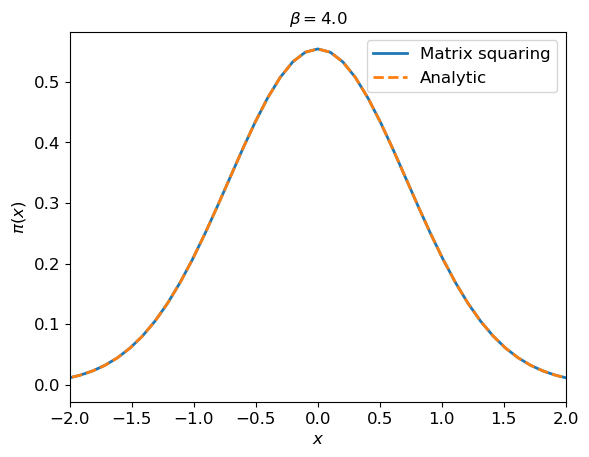

In [34]:
plt.figsize=(6, 4)
plt.title(r'$\beta = %s$' % beta)
plt.plot(x, pi_of_x, linewidth=2, label='Matrix squaring')
plt.plot(x, [analytic_quantum_probability(x, beta) for x in x], '--', linewidth=2, label='Analytic')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$\pi(x)$')
plt.xlim(-2, 2)

In [23]:
x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]
beta_temp = 2.0 ** (-5)
beta = 2.0 ** 2
rho = rho_harmonic_trotter(x, beta_temp, harmonic_potential)

while beta_temp < beta:
    rho = np.dot(rho, rho)
    rho *= dx
    beta_temp *= 2.0
    print('beta: %s -> %s' % (beta_temp / 2.0, beta_temp))

Z = sum(rho[j, j] for j in range(nx + 1)) * dx
pi_of_x = [rho[j, j] / Z for j in range(nx + 1)]

f = open('data_harm_matrix_squaring_beta' + str(beta) + '.dat', 'w')
for j in range(nx + 1):
    f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
f.close()

beta: 0.03125 -> 0.0625
beta: 0.0625 -> 0.125
beta: 0.125 -> 0.25
beta: 0.25 -> 0.5
beta: 0.5 -> 1.0
beta: 1.0 -> 2.0
beta: 2.0 -> 4.0


(-2.0, 2.0)

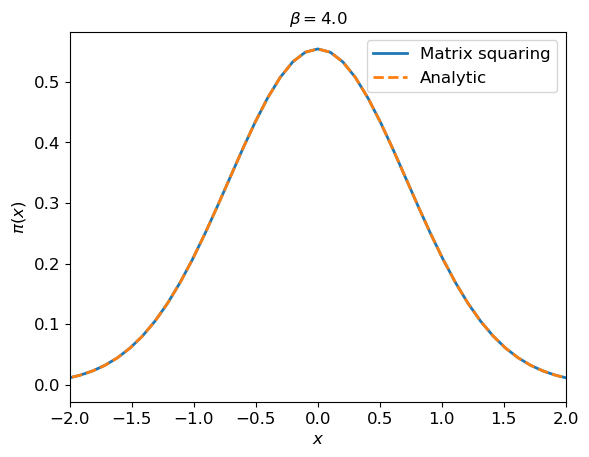

In [24]:
plt.figsize=(6, 4)
plt.title(r'$\beta = %s$' % beta)
plt.plot(x, pi_of_x, linewidth=2, label='Matrix squaring')
plt.plot(x, [analytic_quantum_probability(x, beta) for x in x], '--', linewidth=2, label='Analytic')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$\pi(x)$')
plt.xlim(-2, 2)

## Changing dx

In [ ]:
dxs = [0.1, 0.5, 1.0, 2.0]

In [ ]:
def read_file(filename):
    
    """Reads a file with two columns and returns two lists
    Args:
        filename (string): name of the file
    Returns:
        list: list of the first column
        list: list of the second column
    """

    list_x = []
    list_y = []
    with open(filename) as f:
        for line in f:
            x, y = line.split()
            list_x.append(float(x))
            list_y.append(float(y))
    f.close()
    return list_x, list_y

In [ ]:
def rho_free(x, y, beta):
    """ Free off-diagonal density matrix
    Args:
        x (float): position of the particle
        y (float): position of the particle
        beta (float): inverse temperature
    Returns:
        float: value of the density matrix at x and y and beta
    """
    return np.exp(-(x - y) ** 2 / (2.0 * beta))

In [ ]:
beta = 4.0 
N = 10
dtau = beta / N
delta = 1.0
n_steps = 100000
x = [0.0] * N

x_0 = []
x_k = []


for step in range(n_steps):
    k = np.random.randint(0, N)
    knext, kprev = (k + 1) % N, (k - 1) % N
    
    x_new = x[k] + np.random.uniform(-delta, delta)
    
    old_weight  = (rho_free(x[knext], x[k], dtau) * rho_free(x[k], x[kprev], dtau) * np.exp(-0.5 * dtau * x[k] ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) * rho_free(x_new, x[kprev], dtau) * np.exp(-0.5 * dtau * x_new ** 2))

    if np.random.uniform(0.0, 1.0) < (new_weight / old_weight):
        x[k] = x_new

    if step%10 == 0:
        x_0.append(x[0])
        x_k.append(x[4])

In [ ]:
list_x, list_y = read_file('data_harm_matrix_squaring_beta4.0.dat')

plt.figure(figsize=(6, 4))
new_grid = np.linspace(-4, 4, 100)
plt.plot(new_grid, [analytic_quantum_probability(x, beta) for x in new_grid], 'k-', linewidth=2, label='Analytic')
plt.plot(list_x, list_y, 'g--', linewidth=2, label='Matrix squaring')
plt.hist(x_0, density=True, bins=40, label='Path 0')
plt.hist(x_k, density=True, bins=40, alpha=0.7, label='Path k')
plt.legend()
plt.xlim(-2, 2) 
plt.xlabel(r'$x$')
plt.ylabel(r'$\pi(x)$')